# **Week 2: Numerical Data Summaries**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This week, we will explore basic summary statistics for numerical data and demonstrate how to compute them in R. If you are not familiar with R programming, please take some time to review [Week 0](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_0.ipynb) and [Week 1](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_1.ipynb) content.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [81]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

**Do not modify the following**

In [82]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "IRdisplay") %in% loadedNamespaces()))

})

test_that("Test if all utility functions have been loaded", {
  expect_true(exists("skewness"))
  expect_true(exists("kurtosis"))
  expect_true(exists("Mode"))
  expect_true(exists("FDbinning"))
  expect_true(exists("ModeBinMidpoint"))
})

Test passed 😀
Test passed 😸


## **Classification of Data**


This is a diagram of data types.

In [50]:
svgCode = paste(readLines("figures/classif_of_data.svg", warn = F), collapse = "\n")
display_html(svgCode)

<path d="M73.98185324367088,276.5L137.98922034608407,149.51500958610907Q142.28125,141 151.81681011997318,141L168.4609375,141" id="L_A_C_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 167.06260681152344 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_A_C_0" data-points="W3sieCI6NzMuOTgxODUzMjQzNjcwODgsInkiOjI3Ni41fSx7IngiOjE0Mi4yODEyNSwieSI6MTQxfSx7IngiOjE3Mi40NjA5Mzc1LCJ5IjoxNDF9XQ==" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M73.98185324367088,321.5L137.98922034608407,448.48499041389096Q142.28125,457 151.81681011997318,457L163.28125,457" id="L_A_B_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 161.88291931152344 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_A_B_0" data-points="W3sieCI6NzMuOTgxODUzMjQzNjcwODgsInkiOjMyMS41fSx7IngiOjE0Mi4yODEyNSwieSI6NDU3fSx7IngiOjE2Ny4yODEyNSwieSI6NDU3fV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,118.5L296.4437170904412,69.33885500932236Q303.953125,62 314.453125,62L324.953125,62" id="L_C_G_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.80984497070312 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_C_G_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5IjoxMTguNX0seyJ4IjozMDMuOTUzMTI1LCJ5Ijo2Mn0seyJ4IjozMjguOTUzMTI1LCJ5Ijo2Mn1d" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,163.5L296.4437170904412,212.66114499067763Q303.953125,220 314.453125,220L324.953125,220" id="L_C_F_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.80984497070312 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_C_F_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5IjoxNjMuNX0seyJ4IjozMDMuOTUzMTI1LCJ5IjoyMjB9LHsieCI6MzI4Ljk1MzEyNSwieSI6MjIwfV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,434.5L296.4437170904412,385.33885500932234Q303.953125,378 314.453125,378L324.953125,378" id="L_B_E_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.8098373413086 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_B_E_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5Ijo0MzQuNX0seyJ4IjozMDMuOTUzMTI1LCJ5IjozNzh9LHsieCI6MzI4Ljk1MzEyNSwieSI6Mzc4fV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,479.5L296.4437170904412,528.6611449906776Q303.953125,536 314.453125,536L324.953125,536" id="L_B_D_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.80985260009766 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_B_D_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5Ijo0NzkuNX0seyJ4IjozMDMuOTUzMTI1LCJ5Ijo1MzZ9LHsieCI6MzI4Ljk1MzEyNSwieSI6NTM2fV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/> Data Types Numerical Categorical Continuous Examples: Weight, height, room temperature, time Discrete Examples: Number of children, dice rolls Ordinal Examples: Education level, satisfaction rating (1-5) Nominal Examples: Gender, color, country, suburb

As you go lower in the diagram, the data types become more specific but also a bit more limited — they carry less detailed information and support fewer types of analysis, and you can do fewer kinds of analysis on them.

In this unit, we’ll focus exclusively on numerical data — by far the most common type encountered in data analysis tasks. Categorical data will be briefly touched on in later workshops.

In [77]:
install.packages("dissimilarities")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



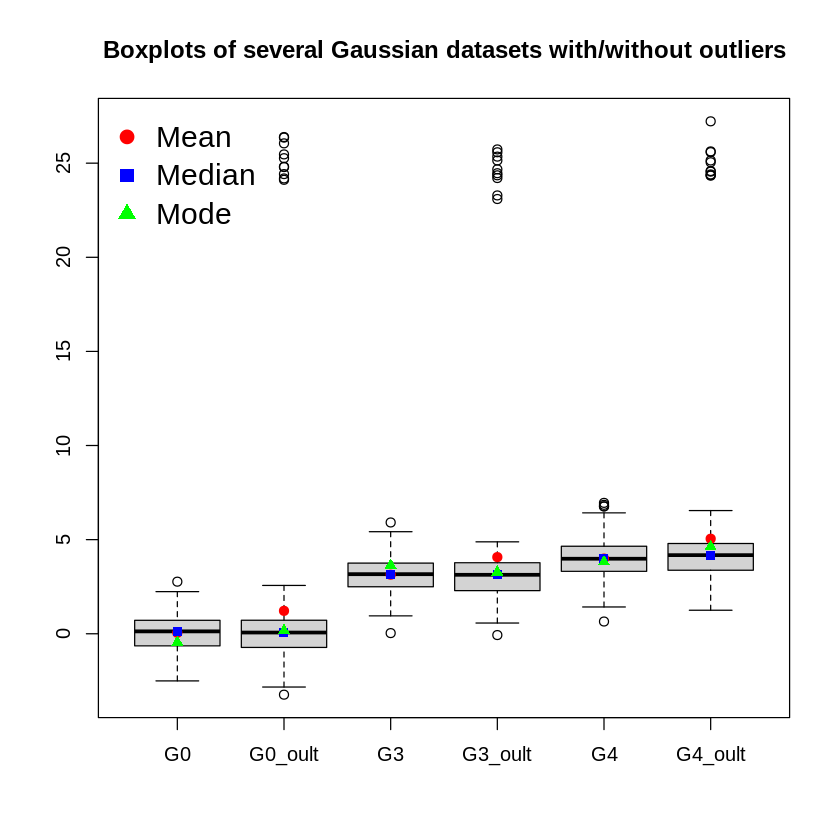

In [85]:
X = read.csv("./datasets/centraltendency")
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

cMeans = colMeans(X)
cMedians = apply(X, 2, median)
cModes = apply(X, 2, ModeBinMidpoint)
points(1:6, cMeans, pch = 19, col = "red", cex = 1)
points(1:6, cMedians, pch = 15, col = "blue", cex = 1)
points(1:6, cModes, pch = 17, col = "green", cex = 1)

# Add legend
legend("topleft", legend = c("Mean", "Median", "Mode"),
       cex = c(1.5, 1.5, 1.5), col = c("red", "blue", "green"), bty = "n",
       pch = c(19,15,17))

## **The Three Main Summary Statistics of Numerical Data**

### **Measures of Central Tendency**
